# Let's jump right in and start looking at some practical SQL

In this exercise we are going to rely on SQLite. This is a small, fast and lightweight SQL variant. In the lecture examples we saw MySQL. All variants of SQL work in a similar way. We chose SQLite for these exercises because of the lightweight profile and the ability to work from a local instance without a complicated setup. 

[Find out more here](https://www.w3resource.com/sqlite/)

In [6]:
!pip install sql ipython-sql

In [7]:
import sqlite3 as sql
import pandas as pd


In [8]:
%load_ext sql

The sql extension is already loaded. To reload it, use:
  %reload_ext sql


Let's begin by creating a database. The following command will create a local instance of our database with the name dataProgramming.db. If you get an error then check:
- That you have run the above code cell and that the libraries are installed and working on your machine.
- That you have the correct permissions on your local machine.


In [9]:
%sql sqlite:///dataProgramming.db

## Create a table

***%%sql*** let you use multiple SQL statements inside a single cell. 

It is now time to create one using a standard SQL command – CREATE TABLE. If the table already existed in the database, an error will pop up. In addition, we set ***PRIMARY KEY*** on USERID to prevent from inserting duplicate writers into the table.

In [10]:
%%sql sqlite://
    Drop Table Users

(sqlite3.OperationalError) no such table: Users
[SQL: Drop Table Users]
(Background on this error at: http://sqlalche.me/e/13/e3q8)


In [11]:
%%sql sqlite://
CREATE TABLE users(
    FirstName VARCHAR(30) NOT NULL,
    LastName VARCHAR(30) NOT NULL,  
    USERID int  NOT NULL UNIQUE,
    EMAIL VARCHAR(50), # nullable
    PRIMARY KEY (USERID)
);

(sqlite3.OperationalError) unrecognized token: "#"
[SQL: CREATE TABLE users(
    FirstName VARCHAR(30) NOT NULL,
    LastName VARCHAR(30) NOT NULL,  
    USERID int  NOT NULL UNIQUE,
    EMAIL VARCHAR(50), # nullable
    PRIMARY KEY (USERID)
);]
(Background on this error at: http://sqlalche.me/e/13/e3q8)


# Playing with queries
Let's add some users. To find out more about this command, read [here](https://www.w3schools.com/sql/sql_insert.asp) 

Run this code and then try to add four users of your own. What happens if you do not insert data in the NOT NULL fields?

In [12]:
%%sql sqlite://
INSERT INTO users(FirstName,LastName,USERID) VALUES ('Ghulam', 'Baker', 1);
INSERT INTO users(FirstName,LastName,USERID) VALUES ('Savannah', 'Shelton', 2);
# You will get an error if you try to run this more than once as there are UNIQUE requirements for these fields.

(sqlite3.OperationalError) no such table: users
[SQL: INSERT INTO users(FirstName,LastName,USERID) VALUES ('Ghulam', 'Baker', 1);]
(Background on this error at: http://sqlalche.me/e/13/e3q8)


### Insert Multiple Values

In [13]:
%%sql Insert Into users (FirstName, LastName, USERID) Values ('Anthony', 'Chia', 3),
('Brian', 'Lee', 4),
('Angel', 'Tan', 5),
('Liam', 'Neckson', 6),
('Henry', 'Park', 7),
('Daniel', 'Boon', 8),
('Hazel', 'Tan', 9),
('Susanna', 'Quek', 10),
('Sylvia', 'Yeoh', 11),
('Britaina', 'Kwok', 12),
('Angeline', 'Zan', 13),
('Lennon', 'Neson',14),
('Harrison', 'WIlliam', 15),
('William', 'Black', 16),
('Bill', 'Clinson', 17),
('Gate', 'Way', 18),
('Cynthia', 'Yeoh', 19)

 * sqlite:///dataProgramming.db
(sqlite3.OperationalError) no such table: users
[SQL: Insert Into users (FirstName, LastName, USERID) Values ('Anthony', 'Chia', 3),
('Brian', 'Lee', 4),
('Angel', 'Tan', 5),
('Liam', 'Neckson', 6),
('Henry', 'Park', 7),
('Daniel', 'Boon', 8),
('Hazel', 'Tan', 9),
('Susanna', 'Quek', 10),
('Sylvia', 'Yeoh', 11),
('Britaina', 'Kwok', 12),
('Angeline', 'Zan', 13),
('Lennon', 'Neson',14),
('Harrison', 'WIlliam', 15),
('William', 'Black', 16),
('Bill', 'Clinson', 17),
('Gate', 'Way', 18),
('Cynthia', 'Yeoh', 19)]
(Background on this error at: http://sqlalche.me/e/13/e3q8)


## Our first query

Let's now try to get some data back. Databases are not all about inserting, in fact queries are more useful. Let's grab all of our data. We can do this by using SELECT and signifying * which is a parameter which indicates all of the columns of a table.

In [14]:

%%sql sqlite://
SELECT * from users

(sqlite3.OperationalError) no such table: users
[SQL: SELECT * from users]
(Background on this error at: http://sqlalche.me/e/13/e3q8)


In [15]:
# one line.. assign
sqlres = %sql SELECT * from users
sqlres

 * sqlite:///dataProgramming.db
(sqlite3.OperationalError) no such table: users
[SQL: SELECT * from users]
(Background on this error at: http://sqlalche.me/e/13/e3q8)


In [33]:
# one line
%sql SELECT * from users

 * sqlite:///dataProgramming.db
Done.


FirstName,LastName,USERID,EMAIL
Ghulam,Baker,1,None
Savannah,Shelton,2,None
Anthony,Chia,3,None
Brian,Lee,4,None
Angel,Tan,5,None
Liam,Neckson,6,None
Henry,Park,7,None
Daniel,Boon,8,None
Hazel,Tan,9,None
Susanna,Quek,10,None


What about if we want to select just the names of people in the table? In this case we are not concerned with the USERID. Let's have a look at how we might construct such a query.

In [34]:
sqlres = %sql SELECT FirstName, LastName from users
sqlres

 * sqlite:///dataProgramming.db
Done.


FirstName,LastName
Ghulam,Baker
Savannah,Shelton
Anthony,Chia
Brian,Lee
Angel,Tan
Liam,Neckson
Henry,Park
Daniel,Boon
Hazel,Tan
Susanna,Quek


### 1. TRY YOURSELF (2 minutes)


In [51]:
''' 
What about if we want to query specific things based on more complex logic? 
Look up Savannah's user ID and put it between the apostrophes in the USERID=''
'''

%sql SELECT * FROM users WHERE USERID='2'

 * sqlite:///dataProgramming.db
Done.


FirstName,LastName,USERID,EMAIL
Savannah,Shelton,2,None


In [53]:
# We can even do mathematical operations inline, for instance we could use the mod function (%) 
# and look for even fields (divisible by 2 where the integer remainder = 0 ie no remainder.)
%sql SELECT * FROM users WHERE FirstName='Savannah' and USERID %2 = 0

 * sqlite:///dataProgramming.db
Done.


FirstName,LastName,USERID,EMAIL
Savannah,Shelton,2,None


### 2. Try yourself:

#### find how many people with Surname 'Tan' (2 minutes)

In [55]:
%sql SELECT * FROM users WHERE LASTNAME='Tan'

 * sqlite:///dataProgramming.db
Done.


FirstName,LastName,USERID,EMAIL
Angel,Tan,5,None
Hazel,Tan,9,None


### 3. TRY YOURSELF
*** FIND persons whose name start with S  e.g., Savannah, Susanna, Sylvia

See https://www.w3schools.com/sql/sql_like.asp

In [39]:
%sql SELECT * FROM users WHERE FIRSTNAME LIKE 'S%'

 * sqlite:///dataProgramming.db
Done.


FirstName,LastName,USERID,EMAIL
Savannah,Shelton,2,None
Susanna,Quek,10,None
Sylvia,Yeoh,11,None


## Can we rename the table headings from the data we get back from our query? See if you can figure this out using AS

[The AS command](https://www.w3schools.com/sql/sql_ref_as.asp)

### 4. TRY Using AS

In [ ]:
# SELECT something AS something FROM somewhere;


Has the AS command changed the initial data from the table? Run a query on the table to see if it has changed.

In [56]:
# SELECT something AS something FROM somewhere;
%sql SELECT FirstName as [First Name], LastName as [Last Name] from users

 * sqlite:///dataProgramming.db
Done.


First Name,Last Name
Ghulam,Baker
Savannah,Shelton
Anthony,Chia
Brian,Lee
Angel,Tan
Liam,Neckson
Henry,Park
Daniel,Boon
Hazel,Tan
Susanna,Quek


We saw the '*' parameter earlier, where we pull all of our data back. In some cases these sorts of queries can be really inefficient (and expensive!). When our queries bring back all rows and all columns for
a table, it can be really inefficient (and expensive!).  

One way that we can overcome this is by limiting the number of rows we return. 

We can limit the number of rows returned using the LIMIT modifier to our select statement:

In [57]:
%sql SELECT * From users LIMIT 1

 * sqlite:///dataProgramming.db
Done.


FirstName,LastName,USERID,EMAIL
Ghulam,Baker,1,None


In [58]:

%sql Select * from users Order BY LastName ASC

 * sqlite:///dataProgramming.db
Done.


FirstName,LastName,USERID,EMAIL
Ghulam,Baker,1,None
William,Black,16,None
Daniel,Boon,8,None
Anthony,Chia,3,None
Bill,Clinson,17,None
Britaina,Kwok,12,None
Brian,Lee,4,None
Liam,Neckson,6,None
Lennon,Neson,14,None
Henry,Park,7,None


In [59]:

%sql Select * from users Order BY LastName DESC

 * sqlite:///dataProgramming.db
Done.


FirstName,LastName,USERID,EMAIL
Angeline,Zan,13,None
Sylvia,Yeoh,11,None
Cynthia,Yeoh,19,None
Gate,Way,18,None
Harrison,WIlliam,15,None
Angel,Tan,5,None
Hazel,Tan,9,None
Savannah,Shelton,2,None
Susanna,Quek,10,None
Henry,Park,7,None


### 5. Try sorting using First Name

In [60]:
%sql sqlite:///dataProgramming.db
%sql Select * from users Order BY FirstName

 * sqlite:///dataProgramming.db
Done.


FirstName,LastName,USERID,EMAIL
Angel,Tan,5,None
Angeline,Zan,13,None
Anthony,Chia,3,None
Bill,Clinson,17,None
Brian,Lee,4,None
Britaina,Kwok,12,None
Cynthia,Yeoh,19,None
Daniel,Boon,8,None
Gate,Way,18,None
Ghulam,Baker,1,None


## The use of aggregate functions. Can we count the number of users with the same surname? 

[Aggregate functions](https://www.w3resource.com/sql/aggregate-functions/aggregate-function.php)


An aggregate function performs a calculation on one or multiple values (rows) and returns a single value as a result.
We can then use an aggregate function to group our users by their "LastName" and COUNT how many have the same surname.

First of all, add two entries to the users table with identiacal surnames:

### Try 6. Insert

In [67]:
%%sql sqlite://
INSERT INTO users(FIRSTNAME,LASTNAME,USERID) VALUES ('William', 'Clinton',223);
INSERT INTO users(FIRSTNAME,LASTNAME,USERID) VALUES ('Bill', 'Clinton',225);


1 rows affected.


[]

If we use the [COUNT and GROUP BY](https://www.w3resource.com/sql/aggregate-functions/count-with-group-by.php) aggregate functions, we can find out how many users have the same surname:



In [68]:
%sql SELECT LastName, COUNT(*) as Entries from users GROUP BY Lastname;

 * sqlite:///dataProgramming.db
Done.


LastName,Entries
Baker,1
Black,1
Boon,1
Chia,1
Clinson,1
Clinton,3
Kwok,1
Lee,1
Neckson,1
Neson,1


Can you combine the above aggregate function and only LIMIT the query to show the first three rows?

Try adding an ORDER by parameter to the previous query to further refine our output.
You can find some documentation [here](https://www.w3schools.com/sql/sql_ref_order_by.asp)
HINT: Order first!

In [69]:
# We might even want to get smallest/largest values as follows
%sql SELECT min(USERID), max(USERID) from users

 * sqlite:///dataProgramming.db
Done.


min(USERID),max(USERID)
1,225


Now see if you can stretch your legs a bit. Experiment with queries using some or all of the following operators.

- 'AND' 
- 'OR'
- 'NOT' 
- 'IN'
- '<>' 
- '!='
- '>=' 
- '>' 
- '<' 
- '<='

Some examples of syntax for each of these parameters can be found [here](https://www.w3schools.com/sql/default.asp). The logic is somewhat similar to the logic you would use in Python.

### Try 7

Get the table as below using what you have learned.  LIKE FIRSTNAME OR LIKE LASTNAME
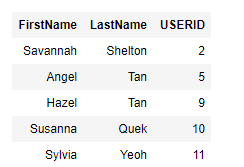

In [75]:
%sql SELECT * FROM users WHERE FIRSTNAME LIKE 'S%' OR LASTNAME LIKE 'T%';

 * sqlite:///dataProgramming.db
Done.


FirstName,LastName,USERID,EMAIL
Savannah,Shelton,2,None
Angel,Tan,5,None
Hazel,Tan,9,None
Susanna,Quek,10,None
Sylvia,Yeoh,11,None


### Try 8

Get the table as below using 'AND'
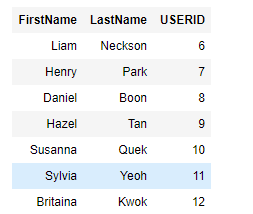

In [76]:
%sql SELECT * FROM users WHERE USERID > 5 AND USERID < 13;

 * sqlite:///dataProgramming.db
Done.


FirstName,LastName,USERID,EMAIL
Liam,Neckson,6,None
Henry,Park,7,None
Daniel,Boon,8,None
Hazel,Tan,9,None
Susanna,Quek,10,None
Sylvia,Yeoh,11,None
Britaina,Kwok,12,None


# Possible Answers:

### Try 1

In [ ]:
%sql SELECT FirstName FROM users WHERE USERID='2'

### Try 2

In [ ]:
%sql select * from users where LastName = 'Tan';

### Try 3
*** FIND persons whose name start with S  e.g., Savannah, Susanna, Sylvia

See https://www.w3schools.com/sql/sql_like.asp

In [ ]:
%sql Select * from users where FirstName LIKE 'S%'

### Try 4

In [ ]:
%sql SELECT FirstName as 'First Name', LastName as 'Last Name' from users

### Try 5
Try sorting using First Na

In [ ]:

%sql Select * from users Order BY FirstName

### Try 6

In [ ]:
%%sql sqlite://
INSERT INTO users VALUES (---, ---,---);
INSERT INTO users VALUES (---, ---,---);


### Try 7

In [ ]:
%sql select * from users where FirstName Like 'S%' OR LastName Like 'T%'

### Try 8

In [ ]:
%sql select * from users where USERID > 5 AND USERID < 13